In [1]:
print("ay")
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
import probfit
import iminuit
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from numpy import random, exp
from scipy.stats import crystalball
from pylab import *
from scipy.special import erf
from scipy.stats import norm
from scipy.optimize import leastsq

ay


In [2]:
original_df1=pd.read_hdf("/mnt/t3nfs01/data01/shome/micheli/energyRegProject_20180223/CMSSW_8_0_4/src/RegressionTraining/applyRegression/ntuples_NN/Ntup_10Nov_Photon_testing.hd5")
original_df_EE=pd.read_hdf("/mnt/t3nfs01/data01/shome/micheli/energyRegProject_20180223/CMSSW_8_0_4/src/RegressionTraining/applyRegression/ntuples_NN_EE/Ntup_10Nov_Photon_testing_EE.hd5")

Opening /mnt/t3nfs01/data01/shome/micheli/energyRegProject_20180223/CMSSW_8_0_4/src/RegressionTraining/applyRegression/ntuples_NN/Ntup_10Nov_Photon_testing.hd5 in read-only mode
Opening /mnt/t3nfs01/data01/shome/micheli/energyRegProject_20180223/CMSSW_8_0_4/src/RegressionTraining/applyRegression/ntuples_NN_EE/Ntup_10Nov_Photon_testing_EE.hd5 in read-only mode


In [ ]:
df=original_df1.copy()
df=df[df['response']>.8]
df=df[df['response']<1.1]
df=df[np.abs(df['pt']-df['pt'].median()) <= (2*df['pt'].std())]
df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values)

x_plot=[]
y_plot=[]
y_err=[]






imported
0


FCN = -4071546.77343 
 TOTAL NCALL = 363 
 NCALLS = 363 
 
 
 EDM = 0.000206275348144 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,alpha,0.515303,0.00109548,,,0.5,0.7,No
1,n,10,0.0339377,,,2,10,No
2,mean,0.994901,1.85958e-05,,,0.99,1.02,No
3,sigma,0.00937579,1.29707e-05,,,0.001,0.011,No


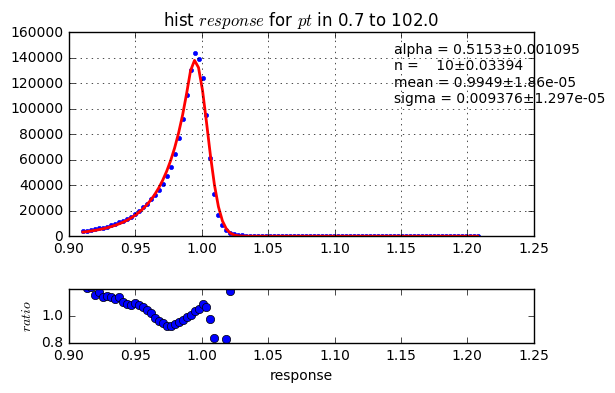

1


KeyboardInterrupt: 

In [95]:
#todo: Add errors in histogramm and ratio sqrt(entries)
k=0
#for original_df in [original_df1,original_df_EE]:
for df in [original_df1,original_df_EE]:
    df=df[df['response']>.8]
    df=df[df['response']<1.1]
    #df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values)
    print "imported"
    x_plot=[]
    y_plot=[]
    y_err=[]


    if k==0:
        suffix='NN'
        k+=1
    else:
        suffix='NN_EE'
    for column in ['pt','scEta','rhoValue']: 
        df=original_df1.copy()
        df=df[df['response']>.8]
        df=df[df['response']<1.1]
        df=df[np.abs(df[column]-df[column].median()) <= (2*df[column].std())]#outlier detection
        df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values) #invert response

        x_plot=[]
        y_plot=[]
        y_err=[]
        y_err_fit=[]
        y_err_sigma=[]

        notused,bins=pd.cut(df[column],20,retbins=True) #equidistant bins 
        for i in xrange(0,len(bins)-1):
            print(i)
            df_temp=df[df[column] >=bins[i]]
            df_temp=df_temp[df_temp[column]<=bins[i+1]]
            if df_temp.size==0:
                print i
                print "empty"
                continue

            ax=plt.subplot2grid((6,3),(0,0), rowspan=4,colspan=4)    
            bound = (.9, 1.1)
            data=df_temp.loc[:,'response'].values
            normalized_crystalball = probfit.Normalized(probfit.crystalball, bound)
            unbinned_likelihood = probfit.UnbinnedLH(normalized_crystalball, data)
            #
            #best_try = probfit.try_uml(normalized_crystalball, data, **params)
            print("this")
            minuit = iminuit.Minuit(unbinned_likelihood,pedantic=False, alpha=.5,limit_alpha=(0.5,0.7),n=3.,limit_n=(2.,10.), mean=1.01,limit_mean=(0.99,1.02),sigma=0.01,limit_sigma=(0.001,0.011))
            print("that")
            minuit.migrad()
            print "fuk"

            coeff=minuit.args


            y_plot.append(coeff[2])
            x_plot.append(df_temp[column].values[np.argmin(df_temp['response'].values-coeff[2])])
            y_err_fit.append(minuit.errors[2])
            y_err_sigma.append(coeff[3])
            (data_edges, datay), (errorp, errorm), (total_pdf_x, total_pdf_y),parts=unbinned_likelihood.draw(minuit,nfbins=100,parmloc=((0.7,0.95)))

            plt.title("hist $response$ for ${}$ in {} to {}".format(column,int(10*bins[i])/10.,int(10*bins[i+1])/10.))
            plt.subplot2grid((5,3),(4,0),rowspan=2,colspan=4).set_yticks([0.8,1])
            ratio=datay/total_pdf_y
            plt.ylim(0.8,1.2)
            plt.plot((data_edges[1:]+data_edges[:-1])/2,ratio,'bo')
            #unbinned_likelihood.draw_residual(minuit,parmloc=(0.7,0.95))
            plt.ylabel(r"$ratio$")
            plt.xlabel("response")
            plt.savefig("plots/CB_{}/{}_{}".format(column,suffix,i)) 
            plt.show()
            #minuit = iminuit.Minuit(unbinned_likelihood, **best_try)
            #unbinned_likelihood.show(minuit)


        plt.figure()
        plt.title("Profile $response$ vs ${}$, Fit error".format(column))
        plt.ylabel(r"$response$")
        plt.xlabel(r"${}$".format(column))
        plt.errorbar(x_plot,y_plot,y_err_fit,fmt='b.')
        plt.savefig("plots/profile_plots_response/Fit_Error_{_}response_vs_{}".format(suffix,column))
        plt.show()
        plt.close()
        plt.figure()
        plt.title("Profile $response$ vs ${}$, Sigma error".format(column))
        plt.ylabel(r"$response$")
        plt.xlabel(r"${}$".format(column))
        plt.errorbar(x_plot,y_plot,y_err_fit,fmt='b.')
        plt.savefig("plots/profile_plots_response/Sigma_Error_{_}response_vs_{}".format(suffix,column))
        plt.show()
        plt.close()


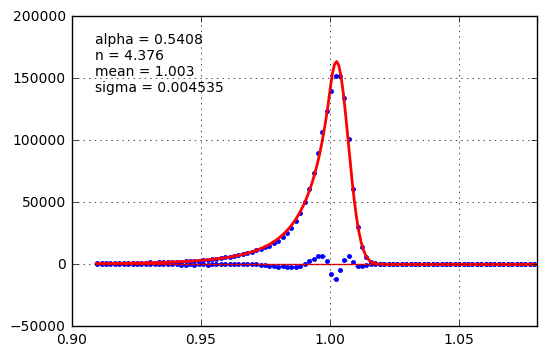

((array([0.90909147, 0.91079999, 0.9125085 , 0.91421702, 0.91592554,
         0.91763405, 0.91934257, 0.92105108, 0.9227596 , 0.92446812,
         0.92617663, 0.92788515, 0.92959366, 0.93130218, 0.93301069,
         0.93471921, 0.93642773, 0.93813624, 0.93984476, 0.94155327,
         0.94326179, 0.94497031, 0.94667882, 0.94838734, 0.95009585,
         0.95180437, 0.95351289, 0.9552214 , 0.95692992, 0.95863843,
         0.96034695, 0.96205546, 0.96376398, 0.9654725 , 0.96718101,
         0.96888953, 0.97059804, 0.97230656, 0.97401508, 0.97572359,
         0.97743211, 0.97914062, 0.98084914, 0.98255766, 0.98426617,
         0.98597469, 0.9876832 , 0.98939172, 0.99110023, 0.99280875,
         0.99451727, 0.99622578, 0.9979343 , 0.99964281, 1.00135133,
         1.00305985, 1.00476836, 1.00647688, 1.00818539, 1.00989391,
         1.01160243, 1.01331094, 1.01501946, 1.01672797, 1.01843649,
         1.020145  , 1.02185352, 1.02356204, 1.02527055, 1.02697907,
         1.02868758, 1.0303961 , 1

In [98]:
unbinned_likelihood.draw_residual()
unbinned_likelihood.show()

In [87]:
 #gauss to select interval for CB
            y_max=y[y.values==y.max()].index.values[0]#get response value of max position
            mu, std = norm.fit(df_temp.loc[:,'response'].values,loc=y_max)##[(df_temp>0.96)&(df_temp<1.1)]
            df_crystal=df_temp[(mu-df_temp) >= -1*std].loc[:,'response']
            df_crystal=df_crystal[(mu-df_crystal<=2*std)]
            df_temp=df_temp[(mu-df_temp['response']) >= -1*std]
            df_temp=df_temp[(mu-df_temp['response']) <= 2*std]

            
            #histogram
            ax=plt.subplot2grid((6,3),(0,0), rowspan=4,colspan=4)
            plt.ylabel(r"$count$")
            plt.xlabel(r"$response$")
            y_n,y_bins,crap=plt.hist(df_crystal.values,bins=binsamount)
        
            y_bins=(y_bins[1:]+y_bins[:-1])/2 #get middle of bin
            y_pred,coeff,err,chi=fit(crystal_ball,y_bins,y_n)#fit
            print(err)
            #plotting #add uncertainty #add err xb
            textstr='\n'.join(( r'$N=%.2f$' % (coeff[0], ),    r'$a=%.2f$' % (coeff[1], ), r'$n=%.2f$' % (coeff[2], ), r'$\bar{x}=%.2f$' % (coeff[3], ), r'$\sigma=%.2f$' % (coeff[4], )))
            
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            plt.text(0.05, 0.95, textstr,  fontsize=14,transform=ax.transAxes, verticalalignment='top', bbox=props)
            plt.plot(y_pred[0],y_pred[1],'r.')
            
            
            y_predx=y_pred[0]
            y_ratio=[]
            for j in xrange(len(y_bins)):
                y_ratio.append(y_pred[1][np.argmin(abs(y_predx-y_bins[j]))]) #find x_interval
            plt.subplot2grid((5,3),(4,0),rowspan=2,colspan=4).set_yticks([0.8,1])
            ratio=y_n/np.array(y_ratio)

            plt.ylim(0.8,1.2)
            plt.plot(y_bins,ratio,'bo')
            plt.ylabel(r"$ratio$")
            plt.xlabel("response")
            plt.title()
            plt.savefig("plots/CB_{}/{}_{}Median".format(column,suffix,i)) 
            plt.show()

            #profile_plots
            y_plot.append(coeff[-2])
            x_plot.append(df_temp[column].values[np.argmin(df_temp['response'].values-coeff[-2])])
            y_err.append(coeff[-1])
        plt.figure()
        plt.title("Profile $response$ vs ${}$".format(column))
        plt.ylabel(r"$response$")
        plt.xlabel(r"${}$".format(column))
        plt.errorbar(x_plot,y_plot,y_err,fmt='b.')
        plt.savefig("plots/profile_plots_response/Median{}response_vs_{}".format(suffix,column))
        plt.show()
        plt.close()

IndentationError: unexpected indent (<ipython-input-87-f99188af836d>, line 2)